In [3]:
import numpy as np
import time

import matplotlib.pyplot as plt

from tqdm import tqdm

from PIL import Image

In [4]:
def generate_random_matrix(rows, cols):
    return np.random.random((rows, cols))

# First Implementation as Formula O(n**4)

In [5]:
def get_dct_itself_scalar_product(k, n):
    p = n if k == 0 else n/2
    print("product = ", p)
    return p

def dct_cosine(k, i, n):
    dct_cosine = np.cos(k*np.pi*(2*i+1)/2*n)
    print("dct_cosine = ", dct_cosine)
    
    return dct_cosine

def dct_sum_j(vector, n, s):
    sum_j = 0
    for j in range(0, n):
        sum_j += vector[j]*dct_cosine(s, j, n)
    
    print("sum_j = ", sum_j)
    p = get_dct_itself_scalar_product(s, n)
    
    
    print("result dct sum_j = ", sum_j*1/p)
    return sum_j*1/p


def dct_sum_i(matrix, n, r, s):
    sum_i = 0
    
    for i in range(0, n):
        sum_i += dct_sum_j(matrix[i], n, r)*dct_cosine(s, i, n)
        
    print("sum_i = ", sum_i)
    
    p = get_dct_itself_scalar_product(r, n)
    
    print("result dct sum_i = ", sum_i*1/p)
    return sum_i*1/p



def dct2_formula_application(matrix):
    
    n = matrix.shape[0]
    coeff_matrix = np.zeros_like(matrix, dtype=np.float64)
    
    for r in range(0, n):
        for s in range(0, n):
            print("r, s = ", (r, s))
            coeff_matrix[r, s] = dct_sum_i(matrix, n, r, s)
    
    return coeff_matrix

# Scipy Implementation

In [6]:
from scipy.fftpack import dct as dct_scipy
from scipy.fftpack import idct as idct_scipy

# Using scipy's dct function
def dct2_scipy(matrix):
    return dct_scipy(dct_scipy(matrix, axis=0, norm='ortho'), axis=1, norm='ortho')


def idct2_scipy(coeff_matrix):
    return idct_scipy(idct_scipy(coeff_matrix, axis=1, norm='ortho'), axis=0, norm='ortho')


matrix = generate_random_matrix(3, 3)
print(matrix)
coeff_matrix = dct2_scipy(matrix)
print(coeff_matrix)

matrix_2 = idct2_scipy(coeff_matrix)
print(matrix_2)



[[0.46789332 0.55371813 0.1116882 ]
 [0.57122219 0.39102687 0.65869343]
 [0.15563447 0.59749177 0.64389596]]
[[ 1.38375478 -0.08962177 -0.11206369]
 [-0.10766428  0.42223331 -0.03822106]
 [-0.16771704  0.01238015 -0.30317194]]
[[0.46789332 0.55371813 0.1116882 ]
 [0.57122219 0.39102687 0.65869343]
 [0.15563447 0.59749177 0.64389596]]


# Custom Implementation O(n**3)

In [7]:
import numpy as np


def dct1(vector, n):
          
    
    coeff_vector = np.zeros_like(vector, dtype=np.float64)
    
    
    for k in range(n):
                       
        cosine = np.cos((np.pi*k*(2*np.arange(n) + 1))/(2*n))        
        
        coeff_vector[k] = np.sqrt(2/n) * np.sum(vector * cosine)
        
    
    
    coeff_vector[0] /= np.sqrt(2)

    return coeff_vector


def custom_dct2(matrix):
    # Get matrix size
    n, m = matrix.shape
    
    # Init coefficient matrix
    coeff_matrix = np.zeros_like(matrix, dtype=np.float64)
    
    # Compute rows DCT for each row
    for i in range(n):
        coeff_matrix[i, :] = dct1(matrix[i, :], n)

    
    # Compute columns DCT for each column of the coefficient matrix
    for j in range(m):
        coeff_matrix[:, j] = dct1(coeff_matrix[:, j], n)
    
    return coeff_matrix




# Time Complexity Analisys

In [13]:
def run_algorithm(alg, matrix):
    start = time.time()
    alg(matrix)
    end = time.time()
    elapsed = end - start
    
    #print(alg)
    #print("elapsed time: ", elapsed)
    
    return elapsed

def iteration(min_dim, max_dim, step):
    
    scipy_alg = []
    custom_alg = [] 
    o3 = []
    o2_logN = []
    x = []
    
    
    
    with tqdm(total = max_dim - min_dim) as pbar:
        for n in range(min_dim, max_dim, step):
            o3.append(n**3)
            o2_logN.append(n**2*np.log(n))
            
            x.append(n)
            
            matrix = generate_random_matrix(n, n)

            scipy_alg.append(run_algorithm(dct2_scipy, matrix))
            custom_alg.append(run_algorithm(custom_dct2, matrix))
            
            pbar.update(step)
    
    return o3, o2_logN, x, scipy_alg, custom_alg


In [14]:
o3, o2_logN, x, scipy_alg, custom_alg = iteration(400, 4000, 400)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3600/3600 [2:02:30<00:00,  2.04s/it]


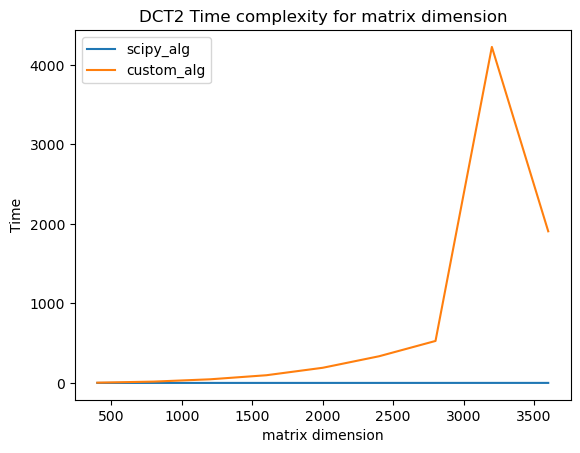

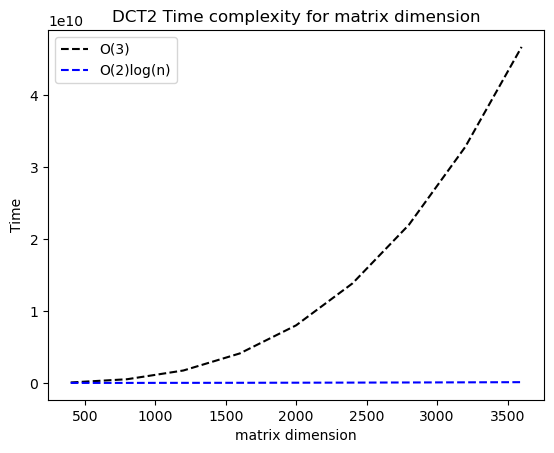

In [15]:



plt.plot(x, scipy_alg, label = "scipy_alg")
plt.plot(x, custom_alg, label = "custom_alg")


plt.title("DCT2 Time complexity for matrix dimension")
plt.xlabel("matrix dimension")
plt.ylabel("Time")

plt.legend()
plt.show()


plt.plot(x, o3, label = "O(3)", linestyle='--',  color='black')
plt.plot(x, o2_logN, label = "O(2)log(n)", linestyle='--', color='blue')


plt.title("DCT2 Time complexity for matrix dimension")
plt.xlabel("matrix dimension")
plt.ylabel("Time")

plt.legend()
plt.show()


# Check Scaling Type

In [ ]:
m = np.array([[231, 32, 233, 161, 24, 71, 140, 245], 
[247, 40, 248, 245, 124, 204, 36, 107], 
[234, 202, 245, 167, 9, 217, 239, 173], 
[193, 190, 100, 167, 43, 180, 8, 70], 
[11, 24, 210, 177, 81, 243, 8, 112], 
[97, 195, 203, 47, 125, 114, 165, 181], 
[193, 70, 174, 167, 41, 30, 127, 245], 
[87, 149, 57, 192, 65, 129, 178, 228]] )

In [ ]:
custom_dct2(m)

In [ ]:
dct2_scipy(m)

In [ ]:
dct_scipy(m, axis=1, norm='ortho')

In [11]:


def divide_image_into_blocks(image_path, block_size):
    
    image = Image.open(image_path)
    
    if image.mode != 'L':
        print("converting image as grayscale")
        image = image.convert('L')
    
    
    image_array = np.array(image)
    
    #print(image_array)
    
    height, width = image_array.shape
    print(height, width)
    
    
    num_blocks_height = height // block_size
    num_blocks_width = width // block_size
    
    print(num_blocks_height)
    print(num_blocks_width)
    
    
    # Initialize a list to store the image blocks
    blocks = []
    
    # Iterate over the blocks and extract each block
    for i in range(num_blocks_height):
        for j in range(num_blocks_width):
            block = image_array[i * block_size:(i + 1) * block_size,
                               j * block_size:(j + 1) * block_size]
            blocks.append(block)
    
    return blocks, num_blocks_height, num_blocks_width, image_array


def get_dct2_blocks(blocks, f, d):
    dct2_blocks = []
    
    for block in blocks:
        dct2_block = dct2_scipy(block)
        
        for i in range(0, f):
            for j in range(0, f):
                if i + j >= d:
                    dct2_block[i, j] = 0
        
        
        dct2_blocks.append(dct2_block)
        
    return dct2_blocks

def get_image(dct2_blocks, f, num_blocks_height, num_blocks_width):
    
    width_list = []
    matrix_list = []
    
    support_matrix = np.zeros((f*num_blocks_height, f*num_blocks_width))
    
    width_counter = 0
    height_counter = 0
    
    for dct2_block in dct2_blocks:
        
        image_block = idct2_scipy(dct2_block)
        
        for i in range(0, f):
            for j in range(0, f):
                image_block[i, j] = round(image_block[i, j])
                image_block[i, j] = max(image_block[i, j], 0)
                image_block[i, j] = min(image_block[i, j], 255)
                
        support_matrix[height_counter:height_counter+f, width_counter:width_counter+f] = image_block
        
        
        width_counter+=f
        
        if width_counter >= f*num_blocks_width:
            width_counter = 0
            height_counter+=f
            
    
    return support_matrix
    


640 640
80
80


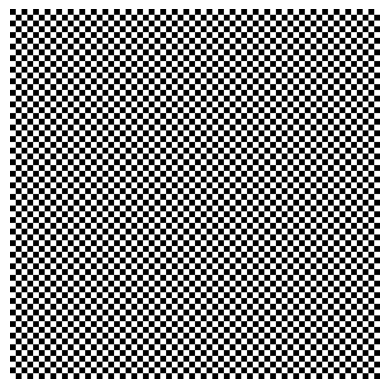

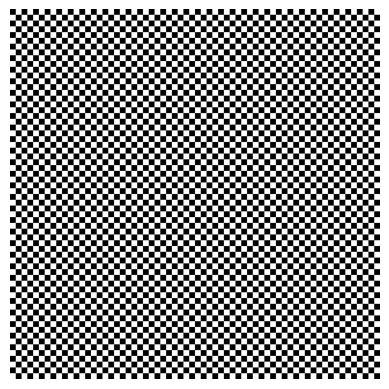

In [13]:
image_path = 'data/640x640.bmp'
block_size = 8
d = 10

blocks, num_blocks_height, num_blocks_width, image = divide_image_into_blocks(image_path, block_size)


dct2_blocks = get_dct2_blocks(blocks, block_size, d)

image_matrix = get_image(dct2_blocks, block_size, num_blocks_height, num_blocks_width)

pic = Image.fromarray(image_matrix).convert('L')
pic.save("data/output/test3.bmp")

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
image_matrix

In [ ]:
import numpy as np



# Define submatrices
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

C = np.array([[9, 10],
              [11, 12]])

D = np.array([[13, 14],
              [15, 16]])

# Build the larger matrix from submatrices
#N = A.shape[0]  # Size of the larger matrix
#M = np.block([[A, B],
#              [C, np.zeros_like(B)]])
#
lista = [A, B, C, D]

lista

In [ ]:
image_path = 'data/20x20.bmp'
block_size = 8
d = 7

blocks, num_blocks_height, num_blocks_width = divide_image_into_blocks(image_path, block_size)

dct2_blocks = get_dct2_blocks(blocks, block_size, d)




width_list = []
matrix_list = []


for dct2_block in dct2_blocks:
    
    if len(width_list) +1 > num_blocks_width:
        matrix_list.append(width_list)
        width_list =[]

    width_list.append(dct2_block)
    

    
np.block(np.array(matrix_list))

In [ ]:
support_matrix = np.zeros((8*2, 8*2))

support_matrix[0:8, 0:8] = np.zeros((8, 8)) + 1


support_matrix